# InstaBot II - Codes may not run if connection is slow, restart from login step to re-run

In [26]:
from selenium import webdriver
import pandas as pd
import time
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup 
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException 
import matplotlib.pyplot as plt

# Login

In [18]:
driver=webdriver.Chrome(executable_path='C:\\ChromeDriver\\chromedriver.exe')
wait=WebDriverWait(driver,10)
driver.get('https://www.instagram.com/')
time.sleep(2)
login=driver.find_element_by_link_text('Log in')
login.click()
time.sleep(2)
username=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/article/div/div[1]/div/form/div[2]/div/label/input')))
usm = username.send_keys("MYUSERNAME")
pwd = driver.find_element_by_name('password').send_keys("MYPASSWORD")
btnLog = driver.find_element_by_tag_name('form').submit()
time.sleep(4)
wait.until(EC.element_to_be_clickable((By.XPATH,"//*[contains(@class, 'aOOlW   HoLwm ')]"))).click()

# From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [28]:
top10foods=['foodtalkindia','dilsefoodie','foodelicious_kw','foodofchennai','foodrush.recipe','foodeatcapture','food',
'foodnetwork','foodozers','chennaifoodtrails']
top10dict={}
for i in top10foods:
    search = wait.until(EC.presence_of_element_located((By.XPATH, "//input[contains(@class,'XTCLo')]")))
    search.clear()
    search.send_keys(i) #search using username
    time.sleep(3)
    fooditerator=driver.find_elements_by_xpath('//span[contains(@class,"Ap253")]')
    for j in fooditerator: #to click on correct handle
        name=j.get_attribute('innerHTML')
        if(name[0]!='#' and name[0]!='<' and name==i): #if handle name is correct
            j.click()
            time.sleep(2)
            num_of_followers1=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')))
            temp=int(num_of_followers1.get_attribute('title').replace(',', ''))
            top10dict[i]=temp #save followers count wrt handle
            break
    time.sleep(2)        
top5=sorted(top10dict.items(), key=lambda x: x[1],reverse=True)[:5]
for i in top5:
    print(i)
    
    

('foodnetwork', 9996985)
('foodrush.recipe', 665463)
('dilsefoodie', 348715)
('foodtalkindia', 290947)
('foodofchennai', 59187)


# Now Find the number of posts these handles have done in the previous 3 days.

In [30]:
num_posts={}
for i in top5:
    search = wait.until(EC.presence_of_element_located((By.XPATH, "//input[contains(@class,'XTCLo')]")))
    search.clear()
    search.send_keys(i[0]) #search using username
    time.sleep(2)
    fooditerator=driver.find_elements_by_xpath('//span[contains(@class,"Ap253")]')
    for j in fooditerator: #to open the correct profile
        name=j.get_attribute('innerHTML')
        if(name[0]!='#' and name[0]!='<' and name==i[0]): #if profile is correct
            j.click()
            time.sleep(2)
            num=0
            wait.until(EC.element_to_be_clickable((By.XPATH,"//div[contains(@class,'_9AhH0')]"))).click()#open first pic
            
            #print(i[0])  ----> name of handle
            while(True):
                timeelement=wait.until(EC.presence_of_element_located((By.XPATH, "/html/body/div[4]/div[2]/div/article/div[2]/div[2]/a/time")))
                timelist=timeelement.text.split()
                if("SECOND" in timelist[1] or "MINUTE" in timelist[1] or "HOUR" in timelist[1] or (("DAY" in timelist[1]) and int(timelist[0])<=3)):
                    num=num+1
                    wait.until(EC.element_to_be_clickable((By.XPATH,"//a[contains(@class,'_65Bje  coreSpriteRightPaginationArrow')]"))).click()#click next pic
                else:
                    break
            num_posts[i[0]]=num            
            wait.until(EC.element_to_be_clickable((By.XPATH,'//*[contains(@aria-label,"Close")]'))).click()
            time.sleep(3) 
            break
print("Note: sometimes browser doesnt have updated details and results are different from the one in mobile,but matches with browser results")
for key,value in num_posts.items():
    print(key,value)
    

Note: sometimes browser doesnt have updated details and results are different from the one in mobile,but matches with browser results
foodnetwork 31
foodrush.recipe 2
dilsefoodie 6
foodtalkindia 11
foodofchennai 1


# Depict this information using a suitable graph.

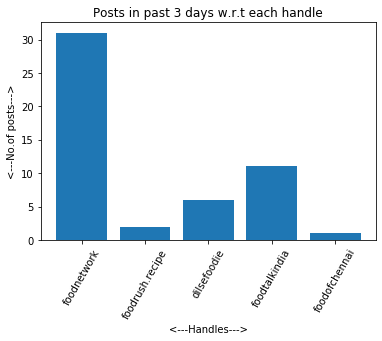

In [32]:
x1=[]
y1=[]
for key,value in num_posts.items():
    x1.append(key)
    y1.append(value)
plt.bar(x1,y1)
plt.xlabel("<---Handles--->")
plt.xticks(rotation=60)
plt.ylabel("<---No.of posts--->")
plt.title("Posts in past 3 days w.r.t each handle")
plt.show()
    

# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [63]:
allcontents=[]  #list for each handle #each handle is a list with content of each post
for i in top5:
    search = wait.until(EC.presence_of_element_located((By.XPATH, "//input[contains(@class,'XTCLo')]")))
    search.clear()
    search.send_keys(i[0]) #type profile name
    time.sleep(2)
    fooditerator=driver.find_elements_by_xpath('//span[contains(@class,"Ap253")]')
    for j in fooditerator: #to get the correct handle from drop down list
            name=j.get_attribute('innerHTML')
            if(name[0]!='#' and name[0]!='<' and name==i[0]):
                j.click()  #click handle needed
                post_list=[] #save captions and comments of each post wrt index
                handle_list=[]
                time.sleep(2)
                wait.until(EC.element_to_be_clickable((By.XPATH,"//div[contains(@class,'_9AhH0')]"))).click()
                print("##############CONTENTS OF HANDLE: "+name+" #######################")
                while(len(handle_list)<10): #to go on till we get 10 posts contents
                        count=0
                        time.sleep(2)
                        print("*******VISIBLE CONTENTS OF POST NO. "+str(len(handle_list)+1)+" OF HANDLE "+name+" *******")
                    #while(True):    
                        comments=driver.find_elements_by_xpath('//div[contains(@class,"C4VMK")]/span')
                        while(count<len(comments)):
                            mystr=comments[count].text.replace("\n"," ") #removes \n as it gets mixed with words
                            mystr=mystr.replace(","," ")
                            mystr=mystr.encode('ascii', 'ignore').decode('ascii') #removes all emojis
                            post_list.append(mystr) #appending comments for each post
                            print(mystr)
                            count=count+1
                     #To load all comments in each post which Im not executing due to some bugs in the website sometimes       
                     #   try:    #if more comments are thereto load in post
                     #       driver.find_element_by_xpath('//span[contains(@aria-label,"Load more comments")]').click()
                     #       time.sleep(3)
                     #   except NoSuchElementException :
                     #           handle_list.append(post_list) #each post contents saved in respective index
                     #           post_list=[] #to make it empty to save nextpost contents
                     #           wait.until(EC.element_to_be_clickable((By.XPATH,"//a[contains(@class,'_65Bje  coreSpriteRightPaginationArrow')]"))).click()
                     #           break #click next post and break
                        
                        handle_list.append(post_list)
                        post_list=[]
                        wait.until(EC.element_to_be_clickable((By.XPATH,"//a[contains(@class,'_65Bje  coreSpriteRightPaginationArrow')]"))).click()
                    
                    
                allcontents.append(handle_list) #ith handle content saved in ith index
                wait.until(EC.element_to_be_clickable((By.XPATH,'//*[contains(@aria-label,"Close")]'))).click()
                break #search for next handles now

         
            
            

##############CONTENTS OF HANDLE: foodnetwork #######################
*******VISIBLE CONTENTS OF POST NO. 1 OF HANDLE foodnetwork *******
Class of the Day: @SunnyAndersons Sweet Glazed Butterflied Chicken  Please any crowd with this sweet  show-stopping chicken. Download the @FoodNetworkKitchen app to watch the full class!
Follow me for amazing culinary content  it would mean so much!!

Oh this looks so yummy
I'm a cartoonist. I do any sort of graphics designs such as cartooning  LOgO designs Flyers Album/mixtape covers DM' me


Looks good lowkey
MMMMMMM

 My mother has cancer: if you see this comment please ask you to enter the link of my profile and help me by donating what you can to be able to pay for my mother's treatment if you cannot with money help us by sharing  Sorry I am desperate  I am afraid

Yummy  
*******VISIBLE CONTENTS OF POST NO. 2 OF HANDLE foodnetwork *******
Wanna cook with @giadadelaurentiis?! Now's your chance! Cook alongside Giada while she makes Chocolate-Haze

# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [70]:
word_dict={}
for i in allcontents:
    for j in i:
        for k in j:
            word_list=k.split()
            for everyword in word_list:
                word_dict[everyword]=word_dict.get(everyword,0)+1
word_dictnew=sorted(word_dict.items(), key=lambda x: x[1],reverse=True)
for i in word_dictnew:
    print(i)
   

('the', 177)
('and', 149)
('to', 105)
('a', 98)
('for', 88)
('in', 69)
('it', 67)
('I', 61)
('.', 61)
('you', 55)
('of', 51)
('is', 48)
('this', 47)
('with', 43)
('your', 43)
('on', 42)
('1', 42)
('tsp', 41)
('tbsp', 37)
('cup', 31)
('at', 30)
('my', 28)
('2', 27)
('so', 21)
('have', 21)
('are', 21)
('Add', 21)
('me', 19)
('be', 19)
('we', 19)
('recipe', 19)
('make', 19)
('as', 18)
('love', 18)
('can', 17)
('one', 17)
('life', 17)
('water', 17)
('or', 17)
('up', 16)
('add', 16)
('i', 16)
('salt', 16)
('by', 15)
('3', 15)
('not', 14)
('that', 14)
('delicious', 14)
('from', 14)
('flour', 14)
('Can', 13)
('You', 13)
('This', 13)
('but', 13)
('an', 13)
('just', 13)
('powder', 13)
('some', 12)
('no', 12)
('all', 12)
('into', 12)
('like', 12)
('if', 11)
('get', 11)
('What', 11)
('very', 11)
('food', 11)
('till', 11)
('red', 11)
('sauce', 11)
('#chennaifoodie', 11)
('cook', 10)
('more', 10)
('will', 10)
('our', 10)
('try', 10)
('time', 10)
('The', 10)
('paneer', 10)
('Ingredients:', 10)
('cho

# Create a csv file with two columns : the word and its frequency

In [71]:
import pandas as pd
df=pd.DataFrame(word_dict.items(),columns=('Word','Frequency'))
df.sort_values(by=['Frequency'],ascending=False,inplace=True)
df=df.reset_index(drop=True)
df.to_csv('wordcount', index=False)  ######TO CSV FILE
df

,Word,Frequency
0,the,177
1,and,149
2,to,105
3,a,98
4,for,88
...,...,...
2582,Substitute,1
2583,carrots?,1
2584,crushing,1
2585,ghee???,1


# Now, find the hashtags that were most popular among these bloggers

In [86]:
top_hashtags=df[df["Word"].str.startswith('#')].reset_index(drop=True)
top_hashtags

,Word,Frequency
0,#chennaifoodie,11
1,#foodrush,10
2,#Chennaidiaries,9
3,#food,9
4,#Dilsefoodie,8
...,...,...
136,#noodles,1
137,#burger,1
138,#maggi,1
139,#desifood,1


# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

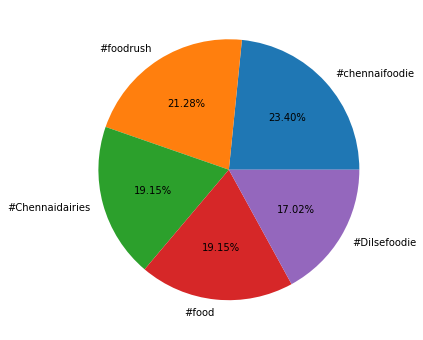

In [33]:
x=['#chennaifoodie','#foodrush','#Chennaidairies','#food','#Dilsefoodie'] #from above
y=[11,10,9,9,8] #from above
plt.figure(figsize=(6,6))
plt.pie(y,labels=x,autopct="%.2f%%")
plt.show()

# Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [20]:
top5names=['foodnetwork','foodrush.recipe','dilsefoodie','foodtalkindia','foodofchennai'] #from previous data
top5followers=[9996985,665463,348715,290947,59187] #from previous data
likes_handle=[]

for i in top5names:
    search = wait.until(EC.presence_of_element_located((By.XPATH, "//input[contains(@class,'XTCLo')]")))
    search.clear()
    search.send_keys(i) #type profile name
    time.sleep(2)
    fooditerator=driver.find_elements_by_xpath('//span[contains(@class,"Ap253")]')
    for j in fooditerator: #to get the correct handle from drop down list
            name=j.get_attribute('innerHTML')
            if(name[0]!='#' and name[0]!='<' and name==i):
                j.click()  #click handle needed
                iteration_no=0
                likes_total=0
                time.sleep(2)
                wait.until(EC.element_to_be_clickable((By.XPATH,"//div[contains(@class,'_9AhH0')]"))).click()
                while(iteration_no<10): #to go on till we get 10 posts contents
                    time.sleep(3)
                    try:
                        likes=driver.find_element_by_xpath("html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span").text.replace(',', '')
                    except NoSuchElementException:
                        wait.until(EC.element_to_be_clickable((By.XPATH,"//span[contains(@class,'vcOH2')]"))).click()
                        time.sleep(1)
                        likes=driver.find_element_by_xpath("html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/div[4]/span").text.replace(',', '')
                        wait.until(EC.element_to_be_clickable((By.XPATH,"html/body/div[4]/div[2]/div/article"))).click()
                #print(likes)
                    likes_total=likes_total+int(likes)                    
                    iteration_no+=1
                    wait.until(EC.element_to_be_clickable((By.XPATH,"//a[contains(@class,'_65Bje  coreSpriteRightPaginationArrow')]"))).click()
            likes_handle.append(likes_total)
            wait.until(EC.element_to_be_clickable((By.XPATH,'//*[contains(@aria-label,"Close")]'))).click()
            break #search for next handles now

for i in range(5):
    print(top5names[i],likes_handle[i])
         
            
            

foodnetwork 134740
foodrush.recipe 195149
dilsefoodie 59719
foodtalkindia 2764
foodofchennai 19121


# Calculate the average likes for a handle.

In [24]:
average_likes=[]
for i in likes_handle:
    average_likes.append(i/10)
print("Average likes per handle:")
for i in range(5):
    print(top5names[i],average_likes[i])
    

Average likes per handle:
foodnetwork 13474.0
foodrush.recipe 19514.9
dilsefoodie 5971.9
foodtalkindia 276.4
foodofchennai 1912.1


# Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [36]:
ratio_handle=[]
for i in range(5):
    ratio_handle.append(top5followers[i]/average_likes[i])
print("Followers:Like ratio -")    
for i in range(5):
    print(top5names[i],round(ratio_handle[i]))
    

Followers:Like ratio -
foodnetwork 742
foodrush.recipe 34
dilsefoodie 58
foodtalkindia 1053
foodofchennai 31


# Create a bar graph to depict the above obtained information.

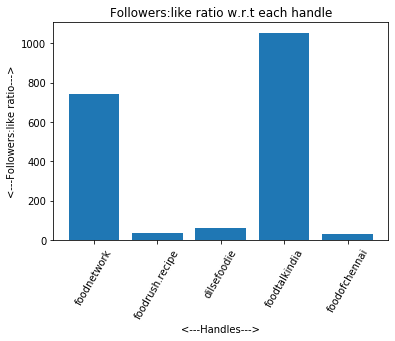

In [35]:
plt.bar(top5names,ratio_handle)
plt.xlabel("<---Handles--->")
plt.xticks(rotation=60)
plt.ylabel("<---Followers:like ratio--->")
plt.title("Followers:like ratio w.r.t each handle")
plt.show()